In [1]:
# 1. Instalar y cargar Kaggle, descomprimir el dataset
!pip install -q kaggle
from google.colab import files

# Subir kaggle.json con tus credenciales
uploaded = files.upload()

# Crear el directorio .kaggle y mover kaggle.json
!mkdir -p ~/.kaggle
!cp "{list(uploaded.keys())[0]}" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Descargar y descomprimir el Sports Image Classification dataset
!kaggle datasets download -d awsaf49/coco-2017-dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/awsaf49/coco-2017-dataset
License(s): CC-BY-SA-4.0
100% 25.0G/25.0G [14:05<00:00, 36.8MB/s]
100% 25.0G/25.0G [14:05<00:00, 31.8MB/s]


In [2]:
!unzip coco-2017-dataset.zip -d ./coco2017

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: ./coco2017/coco2017/val2017/000000000139.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000285.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000632.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000724.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000776.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000785.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000802.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000872.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000885.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001000.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001268.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001296.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001353.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001425.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001490.jpg  
  inflating: ./coco2017/coco2017/val201

In [3]:
import json

# Cargar archivo de anotaciones
with open('/content/coco2017/coco2017/annotations/instances_train2017.json') as f:
    coco_data = json.load(f)

# Extraer las categorías
categories = coco_data['categories']

# Mostrar las clases disponibles
for category in categories:
    print(f"ID: {category['id']}, Nombre: {category['name']}")


ID: 1, Nombre: person
ID: 2, Nombre: bicycle
ID: 3, Nombre: car
ID: 4, Nombre: motorcycle
ID: 5, Nombre: airplane
ID: 6, Nombre: bus
ID: 7, Nombre: train
ID: 8, Nombre: truck
ID: 9, Nombre: boat
ID: 10, Nombre: traffic light
ID: 11, Nombre: fire hydrant
ID: 13, Nombre: stop sign
ID: 14, Nombre: parking meter
ID: 15, Nombre: bench
ID: 16, Nombre: bird
ID: 17, Nombre: cat
ID: 18, Nombre: dog
ID: 19, Nombre: horse
ID: 20, Nombre: sheep
ID: 21, Nombre: cow
ID: 22, Nombre: elephant
ID: 23, Nombre: bear
ID: 24, Nombre: zebra
ID: 25, Nombre: giraffe
ID: 27, Nombre: backpack
ID: 28, Nombre: umbrella
ID: 31, Nombre: handbag
ID: 32, Nombre: tie
ID: 33, Nombre: suitcase
ID: 34, Nombre: frisbee
ID: 35, Nombre: skis
ID: 36, Nombre: snowboard
ID: 37, Nombre: sports ball
ID: 38, Nombre: kite
ID: 39, Nombre: baseball bat
ID: 40, Nombre: baseball glove
ID: 41, Nombre: skateboard
ID: 42, Nombre: surfboard
ID: 43, Nombre: tennis racket
ID: 44, Nombre: bottle
ID: 46, Nombre: wine glass
ID: 47, Nombre: cup

In [4]:
import json

# Cargar el archivo JSON
with open('/content/coco2017/coco2017/annotations/instances_val2017.json', 'r') as f:
    data = json.load(f)

# Imprimir las claves principales del JSON
print("Claves principales en el JSON:", data.keys())

# Imprimir el número de elementos en cada clave principal
for key in data.keys():
    print(f"Número de elementos en '{key}':", len(data[key]))

# Imprimir las primeras categorías (si existen)
if 'categories' in data and data['categories']:
    print("\nPrimeras 5 categorías:")
    for category in data['categories'][:5]:
        print(category)
else:
    print("\nNo se encontraron categorías o la lista está vacía.")

Claves principales en el JSON: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
Número de elementos en 'info': 6
Número de elementos en 'licenses': 8
Número de elementos en 'images': 5000
Número de elementos en 'annotations': 36781
Número de elementos en 'categories': 80

Primeras 5 categorías:
{'supercategory': 'person', 'id': 1, 'name': 'person'}
{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}
{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}
{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}
{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}


In [5]:
import csv
import json

# Cargar el archivo JSON
with open('/content/coco2017/coco2017/annotations/instances_val2017.json', 'r') as f:
    data = json.load(f)

# Obtener las categorías
categories = data['categories']

# Escribir en el archivo CSV
csv_filename = 'coco_categories.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    fieldnames = ['id', 'name', 'supercategory']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for category in categories:
        writer.writerow(category)

# Verificar el contenido del archivo CSV
with open(csv_filename, 'r') as csvfile:
    content = csvfile.read()
    print(f"Contenido del CSV (primeras 200 caracteres):\n{content[:200]}")

print(f"Se han escrito {len(categories)} categorías en {csv_filename}")

Contenido del CSV (primeras 200 caracteres):
id,name,supercategory
1,person,person
2,bicycle,vehicle
3,car,vehicle
4,motorcycle,vehicle
5,airplane,vehicle
6,bus,vehicle
7,train,vehicle
8,truck,vehicle
9,boat,vehicle
10,traffic light,outdoor
11,f
Se han escrito 80 categorías en coco_categories.csv


In [6]:
import json

# Cargar el archivo JSON
with open('/content/coco2017/coco2017/annotations/instances_val2017.json', 'r') as f:
    data = json.load(f)

# Imprimir las claves principales del JSON
print("Claves principales en el JSON:", data.keys())

# Imprimir el número de elementos en cada clave principal
for key in data.keys():
    print(f"Número de elementos en '{key}':", len(data[key]))

# Imprimir las primeras 10 anotaciones
if 'annotations' in data and data['annotations']:
    print("\nPrimeras 5 anotaciones:")
    for annotation in data['annotations'][:5]:
        print(json.dumps(annotation, indent=2))  # Usamos json.dumps para una salida más legible
else:
    print("\nNo se encontraron anotaciones o la lista está vacía.")

Claves principales en el JSON: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
Número de elementos en 'info': 6
Número de elementos en 'licenses': 8
Número de elementos en 'images': 5000
Número de elementos en 'annotations': 36781
Número de elementos en 'categories': 80

Primeras 5 anotaciones:
{
  "segmentation": [
    [
      510.66,
      423.01,
      511.72,
      420.03,
      510.45,
      416.0,
      510.34,
      413.02,
      510.77,
      410.26,
      510.77,
      407.5,
      510.34,
      405.16,
      511.51,
      402.83,
      511.41,
      400.49,
      510.24,
      398.16,
      509.39,
      397.31,
      504.61,
      399.22,
      502.17,
      399.64,
      500.89,
      401.66,
      500.47,
      402.08,
      499.09,
      401.87,
      495.79,
      401.98,
      490.59,
      401.77,
      488.79,
      401.77,
      485.39,
      398.58,
      483.9,
      397.31,
      481.56,
      396.35,
      478.48,
      395.93,
      476.68

In [7]:
import csv
import json

# Cargar el archivo JSON
with open('/content/coco2017/coco2017/annotations/instances_val2017.json', 'r') as f:
    data = json.load(f)

# Imprimir las claves principales del JSON
print("Claves principales en el JSON:", data.keys())

# Imprimir el número de elementos en cada clave principal
for key in data.keys():
    print(f"Número de elementos en '{key}':", len(data[key]))

# Obtener las anotaciones
annotations = data.get('annotations', [])

# Definir el nombre del archivo CSV
csv_filename = 'coco_annotations.csv'

# Escribir las anotaciones en el archivo CSV
with open(csv_filename, 'w', newline='') as csvfile:
    # Definir los nombres de los campos a incluir en el CSV
    fieldnames = ['id', 'image_id', 'category_id', 'bbox', 'area', 'iscrowd']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for annotation in annotations:
        # Asegurarse de que el campo 'bbox' se escribe como una cadena
        writer.writerow({
            'id': annotation['id'],
            'image_id': annotation['image_id'],
            'category_id': annotation['category_id'],
            'bbox': str(annotation['bbox']),  # bbox es una lista, por lo que la convertimos en cadena
            'area': annotation['area'],
            'iscrowd': annotation['iscrowd']
        })

# Verificar el contenido del archivo CSV
with open(csv_filename, 'r') as csvfile:
    content = csvfile.read()
    print(f"\nContenido del CSV (primeros 200 caracteres):\n{content[:200]}")

print(f"\nSe han escrito {len(annotations)} anotaciones en {csv_filename}")


Claves principales en el JSON: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
Número de elementos en 'info': 6
Número de elementos en 'licenses': 8
Número de elementos en 'images': 5000
Número de elementos en 'annotations': 36781
Número de elementos en 'categories': 80

Contenido del CSV (primeros 200 caracteres):
id,image_id,category_id,bbox,area,iscrowd
1768,289343,18,"[473.07, 395.93, 38.65, 28.67]",702.1057499999998,0
1773,61471,18,"[272.1, 200.23, 151.97, 279.77]",27718.476299999995,0
2551,472375,18,"[124.

Se han escrito 36781 anotaciones en coco_annotations.csv


Imagen: 000000294404.jpg, Tamaño: 500x375
Imagen: 000000136117.jpg, Tamaño: 640x480
Imagen: 000000277776.jpg, Tamaño: 640x480
Imagen: 000000324500.jpg, Tamaño: 640x480
Imagen: 000000147369.jpg, Tamaño: 612x612


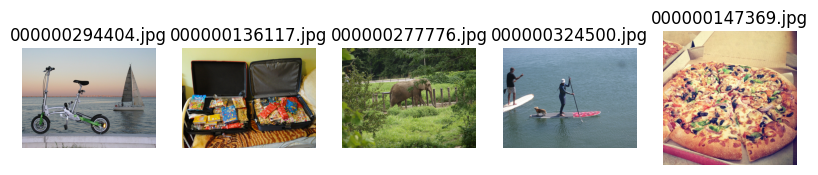

In [8]:
# 2. Hacer un muestreo del dataset para verificar su contenido y tamaño
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Directorio de las imágenes
train_dir = '/content/coco2017/coco2017/train2017'

# Obtener una lista de archivos de imagen
image_files = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]

# Seleccionar 5 imágenes aleatoriamente
random_images = random.sample(image_files, 5)

# Mostrar las imágenes y sus dimensiones
plt.figure(figsize=(10,5))
for i, image_file in enumerate(random_images):
    img = Image.open(os.path.join(train_dir, image_file))
    width, height = img.size
    print(f"Imagen: {image_file}, Tamaño: {width}x{height}")
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)
plt.show()

In [9]:
  # 3. Tamaño de elementos para carpeta train
  import os

  # ruta de la carpeta
  dir_path = r'/content/coco2017/coco2017/test2017'
  count = 0
  # Itera dentro de la carpeta, es un contador
  for path in os.listdir(dir_path):
      # verifica si la ruta actual es un arhico
      if os.path.isfile(os.path.join(dir_path, path)):
          count += 1
  print('Número total de elementos:', count)

Número total de elementos: 40670


In [10]:
# 3. Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/coco2017/coco2017/train2017'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 118287


In [11]:
# 3. Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/coco2017/coco2017/val2017'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 5000


In [12]:
import os

# Crear una estructura de directorios
os.makedirs('/content/dataset/images')
os.makedirs('/content/dataset/labels')
os.makedirs('/content/images_coco_complete')

# Verificar los directorios creados
print(os.listdir())

['.config', 'dataset', 'coco2017', 'coco-2017-dataset.zip', 'coco_annotations.csv', 'images_coco_complete', 'coco_categories.csv', 'coco_128.yaml', 'kaggle.json', 'sample_data']


In [13]:
""" ENTRENAMIENTO COMPLETO DE COCO OCUPA MUCHA CAPACIDAD DE CÓMPUTO, COMPLICADO HACERLO EN COLAB CON TODO EL DATASET"
import json
import os
from PIL import Image

# Rutas
coco_annotations_path = '/content/coco2017/coco2017/annotations/instances_train2017.json'
output_dir = '/content/dataset/labels/train'
images_dir = '/content/coco2017/coco2017/train2017'

# Asegurarse de que el directorio de salida exista
os.makedirs(output_dir, exist_ok=True)

# Predefinir el mapeo de categorías con los índices correctos
category_mapping = {
    1: 0,  # person
    2: 1,  # bicycle
    3: 2,  # car
    4: 3,  # motorcycle
    5: 4,  # airplane
    6: 5,  # bus
    7: 6,  # train
    8: 7,  # truck
    9: 8,  # boat
    10: 9,  # traffic light
    11: 10,  # fire hydrant
    13: 11,  # stop sign
    14: 12,  # parking meter
    15: 13,  # bench
    16: 14,  # bird
    17: 15,  # cat
    18: 16,  # dog
    19: 17,  # horse
    20: 18,  # sheep
    21: 19,  # cow
    22: 20,  # elephant
    23: 21,  # bear
    24: 22,  # zebra
    25: 23,  # giraffe
    27: 24,  # backpack
    28: 25,  # umbrella
    31: 26,  # handbag
    32: 27,  # tie
    33: 28,  # suitcase
    34: 29,  # frisbee
    35: 30,  # skis
    36: 31,  # snowboard
    37: 32,  # sports ball
    38: 33,  # kite
    39: 34,  # baseball bat
    40: 35,  # baseball glove
    41: 36,  # skateboard
    42: 37,  # surfboard
    43: 38,  # tennis racket
    44: 39,  # bottle
    46: 40,  # wine glass
    47: 41,  # cup
    48: 42,  # fork
    49: 43,  # knife
    50: 44,  # spoon
    51: 45,  # bowl
    52: 46,  # banana
    53: 47,  # apple
    54: 48,  # sandwich
    55: 49,  # orange
    56: 50,  # broccoli
    57: 51,  # carrot
    58: 52,  # hot dog
    59: 53,  # pizza
    60: 54,  # donut
    61: 55,  # cake
    62: 56,  # chair
    63: 57,  # couch
    64: 58,  # potted plant
    65: 59,  # bed
    67: 60,  # dining table
    70: 61,  # toilet
    72: 62,  # tv
    73: 63,  # laptop
    74: 64,  # mouse
    75: 65,  # remote
    76: 66,  # keyboard
    77: 67,  # cell phone
    78: 68,  # microwave
    79: 69,  # oven
    80: 70,  # toaster
    81: 71,  # sink
    82: 72,  # refrigerator
    84: 73,  # book
    85: 74,  # clock
    86: 75,  # vase
    87: 76,  # scissors
    88: 77,  # teddy bear
    89: 78,  # hair drier
    90: 79   # toothbrush
}

# Cargar el archivo JSON de anotaciones COCO
with open(coco_annotations_path, 'r') as f:
    coco_data = json.load(f)

# Crear un diccionario para almacenar las dimensiones de las imágenes
image_dimensions = {}

# Obtener las dimensiones de todas las imágenes
for image_info in coco_data['images']:
    image_id = image_info['id']
    image_filename = f"{str(image_id).zfill(12)}.jpg"  # Asegurarse de que el nombre tenga 12 dígitos
    image_path = os.path.join(images_dir, image_filename)
    try:
        with Image.open(image_path) as img:
            image_dimensions[image_id] = img.size
    except IOError:
        print(f"No se pudo abrir la imagen: {image_filename}")

# Procesar las anotaciones
for annotation in coco_data['annotations']:
    image_id = annotation['image_id']
    original_category_id = annotation['category_id']

    if original_category_id not in category_mapping:
        print(f"Categoría ID {original_category_id} no encontrada en el mapeo.")
        continue

    # Obtener el ID mapeado desde el diccionario predefinido
    category_id = category_mapping[original_category_id]

    bbox = annotation['bbox']

    if image_id not in image_dimensions:
        print(f"No se encontraron dimensiones para la imagen ID: {image_id}")
        continue

    image_width, image_height = image_dimensions[image_id]

    # Convertir la caja delimitadora (bbox) al formato YOLO (normalizado)
    x, y, width, height = bbox
    x_center = (x + width / 2) / image_width
    y_center = (y + height / 2) / image_height
    width /= image_width
    height /= image_height

    # Crear el archivo de anotaciones YOLO
    yolo_annotation = f"{category_id} {x_center} {y_center} {width} {height}\n"

    # Asegurarse de que el nombre del archivo de etiquetas también tenga 12 dígitos
    label_filename = os.path.join(output_dir, f"{str(image_id).zfill(12)}.txt")
    with open(label_filename, 'a') as label_file:
        label_file.write(yolo_annotation)

print("Conversión completada.")
"""

' ENTRENAMIENTO COMPLETO DE COCO OCUPA MUCHA CAPACIDAD DE CÓMPUTO, COMPLICADO HACERLO EN COLAB CON TODO EL DATASET"\nimport json\nimport os\nfrom PIL import Image\n\n# Rutas\ncoco_annotations_path = \'/content/coco2017/coco2017/annotations/instances_train2017.json\'\noutput_dir = \'/content/dataset/labels/train\'\nimages_dir = \'/content/coco2017/coco2017/train2017\'\n\n# Asegurarse de que el directorio de salida exista\nos.makedirs(output_dir, exist_ok=True)\n\n# Predefinir el mapeo de categorías con los índices correctos\ncategory_mapping = {\n    1: 0,  # person\n    2: 1,  # bicycle\n    3: 2,  # car\n    4: 3,  # motorcycle\n    5: 4,  # airplane\n    6: 5,  # bus\n    7: 6,  # train\n    8: 7,  # truck\n    9: 8,  # boat\n    10: 9,  # traffic light\n    11: 10,  # fire hydrant\n    13: 11,  # stop sign\n    14: 12,  # parking meter\n    15: 13,  # bench\n    16: 14,  # bird\n    17: 15,  # cat\n    18: 16,  # dog\n    19: 17,  # horse\n    20: 18,  # sheep\n    21: 19,  # cow\n 

In [14]:
import json
import os
from PIL import Image

# Rutas
coco_annotations_path = '/content/coco2017/coco2017/annotations/instances_train2017.json'
output_dir = '/content/dataset/labels/train2017'
images_dir = '/content/coco2017/coco2017/train2017'

# Asegurarse de que el directorio de salida exista
os.makedirs(output_dir, exist_ok=True)

# Predefinir el mapeo de categorías con los índices correctos - ESTOY TOMANDO SOLO LAS PRIMERAS 23 CLASES DE COCO
category_mapping = {
    1: 0,  # person
    2: 1,  # bicycle
    3: 2,  # car
    4: 3,  # motorcycle
    5: 4,  # airplane
}

# Cargar el archivo JSON de anotaciones COCO
with open(coco_annotations_path, 'r') as f:
    coco_data = json.load(f)

# Crear un diccionario para almacenar las dimensiones de las imágenes
image_dimensions = {}

# Obtener las dimensiones de todas las imágenes
for image_info in coco_data['images']:
    image_id = image_info['id']
    image_filename = f"{str(image_id).zfill(12)}.jpg"  # Asegurarse de que el nombre tenga 12 dígitos
    image_path = os.path.join(images_dir, image_filename)
    try:
        with Image.open(image_path) as img:
            image_dimensions[image_id] = img.size
    except IOError:
        print(f"No se pudo abrir la imagen: {image_filename}")

# Procesar las anotaciones
for annotation in coco_data['annotations']:
    image_id = annotation['image_id']
    original_category_id = annotation['category_id']

    if original_category_id not in category_mapping:
        print(f"Categoría ID {original_category_id} no encontrada en el mapeo.")
        continue

    # Obtener el ID mapeado desde el diccionario predefinido
    category_id = category_mapping[original_category_id]

    bbox = annotation['bbox']

    if image_id not in image_dimensions:
        print(f"No se encontraron dimensiones para la imagen ID: {image_id}")
        continue

    image_width, image_height = image_dimensions[image_id]

    # Convertir la caja delimitadora (bbox) al formato YOLO (normalizado)
    x, y, width, height = bbox
    x_center = (x + width / 2) / image_width
    y_center = (y + height / 2) / image_height
    width /= image_width
    height /= image_height

    # Crear el archivo de anotaciones YOLO
    yolo_annotation = f"{category_id} {x_center} {y_center} {width} {height}\n"

    # Asegurarse de que el nombre del archivo de etiquetas también tenga 12 dígitos
    label_filename = os.path.join(output_dir, f"{str(image_id).zfill(12)}.txt")
    with open(label_filename, 'a') as label_file:
        label_file.write(yolo_annotation)

print("Conversión completada.")


Se han truncado las últimas 5000 líneas del flujo de salida.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el mapeo.
Categoría ID 63 no encontrada en el 

In [15]:
import os

# ruta de la carpeta
dir_path = r'/content/dataset/labels/train2017'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 70548


In [16]:
""" ENTRENAMIENTO COMPLETO DE COCO OCUPA MUCHA CAPACIDAD DE CÓMPUTO, COMPLICADO HACERLO EN COLAB CON TODO EL DATASET
import json
import os
from PIL import Image

# Rutas
coco_annotations_path = '/content/coco2017/coco2017/annotations/instances_val2017.json'
output_dir = '/content/dataset/labels/val'
images_dir = '/content/coco2017/coco2017/val2017'

# Asegurarse de que el directorio de salida exista
os.makedirs(output_dir, exist_ok=True)

# Predefinir el mapeo de categorías con los índices correctos
category_mapping = {
    1: 0,  # person
    2: 1,  # bicycle
    3: 2,  # car
    4: 3,  # motorcycle
    5: 4,  # airplane
    6: 5,  # bus
    7: 6,  # train
    8: 7,  # truck
    9: 8,  # boat
    10: 9,  # traffic light
    11: 10,  # fire hydrant
    13: 11,  # stop sign
    14: 12,  # parking meter
    15: 13,  # bench
    16: 14,  # bird
    17: 15,  # cat
    18: 16,  # dog
    19: 17,  # horse
    20: 18,  # sheep
    21: 19,  # cow
    22: 20,  # elephant
    23: 21,  # bear
    24: 22,  # zebra
    25: 23,  # giraffe
    27: 24,  # backpack
    28: 25,  # umbrella
    31: 26,  # handbag
    32: 27,  # tie
    33: 28,  # suitcase
    34: 29,  # frisbee
    35: 30,  # skis
    36: 31,  # snowboard
    37: 32,  # sports ball
    38: 33,  # kite
    39: 34,  # baseball bat
    40: 35,  # baseball glove
    41: 36,  # skateboard
    42: 37,  # surfboard
    43: 38,  # tennis racket
    44: 39,  # bottle
    46: 40,  # wine glass
    47: 41,  # cup
    48: 42,  # fork
    49: 43,  # knife
    50: 44,  # spoon
    51: 45,  # bowl
    52: 46,  # banana
    53: 47,  # apple
    54: 48,  # sandwich
    55: 49,  # orange
    56: 50,  # broccoli
    57: 51,  # carrot
    58: 52,  # hot dog
    59: 53,  # pizza
    60: 54,  # donut
    61: 55,  # cake
    62: 56,  # chair
    63: 57,  # couch
    64: 58,  # potted plant
    65: 59,  # bed
    67: 60,  # dining table
    70: 61,  # toilet
    72: 62,  # tv
    73: 63,  # laptop
    74: 64,  # mouse
    75: 65,  # remote
    76: 66,  # keyboard
    77: 67,  # cell phone
    78: 68,  # microwave
    79: 69,  # oven
    80: 70,  # toaster
    81: 71,  # sink
    82: 72,  # refrigerator
    84: 73,  # book
    85: 74,  # clock
    86: 75,  # vase
    87: 76,  # scissors
    88: 77,  # teddy bear
    89: 78,  # hair drier
    90: 79   # toothbrush
}

# Cargar el archivo JSON de anotaciones COCO
with open(coco_annotations_path, 'r') as f:
    coco_data = json.load(f)

# Crear un diccionario para almacenar las dimensiones de las imágenes
image_dimensions = {}

# Obtener las dimensiones de todas las imágenes
for image_info in coco_data['images']:
    image_id = image_info['id']
    image_filename = f"{str(image_id).zfill(12)}.jpg"  # Asegurarse de que el nombre tenga 12 dígitos
    image_path = os.path.join(images_dir, image_filename)
    try:
        with Image.open(image_path) as img:
            image_dimensions[image_id] = img.size
    except IOError:
        print(f"No se pudo abrir la imagen: {image_filename}")

# Procesar las anotaciones
for annotation in coco_data['annotations']:
    image_id = annotation['image_id']
    original_category_id = annotation['category_id']

    if original_category_id not in category_mapping:
        print(f"Categoría ID {original_category_id} no encontrada en el mapeo.")
        continue

    # Obtener el ID mapeado desde el diccionario predefinido
    category_id = category_mapping[original_category_id]

    bbox = annotation['bbox']

    if image_id not in image_dimensions:
        print(f"No se encontraron dimensiones para la imagen ID: {image_id}")
        continue

    image_width, image_height = image_dimensions[image_id]

    # Convertir la caja delimitadora (bbox) al formato YOLO (normalizado)
    x, y, width, height = bbox
    x_center = (x + width / 2) / image_width
    y_center = (y + height / 2) / image_height
    width /= image_width
    height /= image_height

    # Crear el archivo de anotaciones YOLO
    yolo_annotation = f"{category_id} {x_center} {y_center} {width} {height}\n"

    # Asegurarse de que el nombre del archivo de etiquetas también tenga 12 dígitos
    label_filename = os.path.join(output_dir, f"{str(image_id).zfill(12)}.txt")
    with open(label_filename, 'a') as label_file:
        label_file.write(yolo_annotation)

print("Conversión completada.")
"""

' ENTRENAMIENTO COMPLETO DE COCO OCUPA MUCHA CAPACIDAD DE CÓMPUTO, COMPLICADO HACERLO EN COLAB CON TODO EL DATASET\nimport json\nimport os\nfrom PIL import Image\n\n# Rutas\ncoco_annotations_path = \'/content/coco2017/coco2017/annotations/instances_val2017.json\'\noutput_dir = \'/content/dataset/labels/val\'\nimages_dir = \'/content/coco2017/coco2017/val2017\'\n\n# Asegurarse de que el directorio de salida exista\nos.makedirs(output_dir, exist_ok=True)\n\n# Predefinir el mapeo de categorías con los índices correctos\ncategory_mapping = {\n    1: 0,  # person\n    2: 1,  # bicycle\n    3: 2,  # car\n    4: 3,  # motorcycle\n    5: 4,  # airplane\n    6: 5,  # bus\n    7: 6,  # train\n    8: 7,  # truck\n    9: 8,  # boat\n    10: 9,  # traffic light\n    11: 10,  # fire hydrant\n    13: 11,  # stop sign\n    14: 12,  # parking meter\n    15: 13,  # bench\n    16: 14,  # bird\n    17: 15,  # cat\n    18: 16,  # dog\n    19: 17,  # horse\n    20: 18,  # sheep\n    21: 19,  # cow\n    22: 

In [17]:

import json
import os
from PIL import Image

# Rutas
coco_annotations_path = '/content/coco2017/coco2017/annotations/instances_val2017.json'
output_dir = '/content/dataset/labels/val2017'
images_dir = '/content/coco2017/coco2017/val2017'

# Asegurarse de que el directorio de salida exista
os.makedirs(output_dir, exist_ok=True)

# Predefinir el mapeo de categorías con los índices correctos
category_mapping = {
    1: 0,  # person
    2: 1,  # bicycle
    3: 2,  # car
    4: 3,  # motorcycle
    5: 4,  # airplane
}

# Cargar el archivo JSON de anotaciones COCO
with open(coco_annotations_path, 'r') as f:
    coco_data = json.load(f)

# Crear un diccionario para almacenar las dimensiones de las imágenes
image_dimensions = {}

# Obtener las dimensiones de todas las imágenes
for image_info in coco_data['images']:
    image_id = image_info['id']
    image_filename = f"{str(image_id).zfill(12)}.jpg"  # Asegurarse de que el nombre tenga 12 dígitos
    image_path = os.path.join(images_dir, image_filename)
    try:
        with Image.open(image_path) as img:
            image_dimensions[image_id] = img.size
    except IOError:
        print(f"No se pudo abrir la imagen: {image_filename}")

# Procesar las anotaciones
for annotation in coco_data['annotations']:
    image_id = annotation['image_id']
    original_category_id = annotation['category_id']

    if original_category_id not in category_mapping:
        print(f"Categoría ID {original_category_id} no encontrada en el mapeo.")
        continue

    # Obtener el ID mapeado desde el diccionario predefinido
    category_id = category_mapping[original_category_id]

    bbox = annotation['bbox']

    if image_id not in image_dimensions:
        print(f"No se encontraron dimensiones para la imagen ID: {image_id}")
        continue

    image_width, image_height = image_dimensions[image_id]

    # Convertir la caja delimitadora (bbox) al formato YOLO (normalizado)
    x, y, width, height = bbox
    x_center = (x + width / 2) / image_width
    y_center = (y + height / 2) / image_height
    width /= image_width
    height /= image_height

    # Crear el archivo de anotaciones YOLO
    yolo_annotation = f"{category_id} {x_center} {y_center} {width} {height}\n"

    # Asegurarse de que el nombre del archivo de etiquetas también tenga 12 dígitos
    label_filename = os.path.join(output_dir, f"{str(image_id).zfill(12)}.txt")
    with open(label_filename, 'a') as label_file:
        label_file.write(yolo_annotation)

print("Conversión completada.")

Se han truncado las últimas 5000 líneas del flujo de salida.
Categoría ID 62 no encontrada en el mapeo.
Categoría ID 62 no encontrada en el mapeo.
Categoría ID 62 no encontrada en el mapeo.
Categoría ID 62 no encontrada en el mapeo.
Categoría ID 62 no encontrada en el mapeo.
Categoría ID 62 no encontrada en el mapeo.
Categoría ID 64 no encontrada en el mapeo.
Categoría ID 64 no encontrada en el mapeo.
Categoría ID 64 no encontrada en el mapeo.
Categoría ID 64 no encontrada en el mapeo.
Categoría ID 32 no encontrada en el mapeo.
Categoría ID 32 no encontrada en el mapeo.
Categoría ID 32 no encontrada en el mapeo.
Categoría ID 32 no encontrada en el mapeo.
Categoría ID 37 no encontrada en el mapeo.
Categoría ID 37 no encontrada en el mapeo.
Categoría ID 37 no encontrada en el mapeo.
Categoría ID 37 no encontrada en el mapeo.
Categoría ID 37 no encontrada en el mapeo.
Categoría ID 37 no encontrada en el mapeo.
Categoría ID 37 no encontrada en el mapeo.
Categoría ID 37 no encontrada en el 

In [18]:
import os

# ruta de la carpeta
dir_path = r'/content/dataset/labels/val2017'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 2969


In [19]:
!mv /content/coco2017/coco2017/train2017 /content/dataset/images

In [20]:
!mv /content/coco2017/coco2017/val2017 /content/dataset/images

In [21]:
""" USADO SOLO CUANDO CONSIDERAS TODAS LAS CLASES DE COCO
import os
import pandas as pd

df = pd.read_csv("/content/dataset/labels/train/000000000009.txt", sep=" ")
print(df)
"""

' USADO SOLO CUANDO CONSIDERAS TODAS LAS CLASES DE COCO\nimport os\nimport pandas as pd\n\ndf = pd.read_csv("/content/dataset/labels/train/000000000009.txt", sep=" ")\nprint(df)\n'

In [22]:

""" USADO SOLO CUANDO CONSIDERAS TODAS LAS CLASES DE COCO
import os
from PIL import Image

directorio = "/content/dataset/images/train2017/000000000009.jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()
"""

' USADO SOLO CUANDO CONSIDERAS TODAS LAS CLASES DE COCO\nimport os\nfrom PIL import Image\n\ndirectorio = "/content/dataset/images/train2017/000000000009.jpg"\nimagen = Image.open(directorio)\nplt.imshow(imagen)\nplt.axis(\'off\')\nplt.show()\n'

In [23]:
print(category_mapping)

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4}


In [24]:
""" USADO SOLO CUANDO CONSIDERAS TODAS LAS CLASES DE COCO
import yaml

# Definir las rutas
yaml_data = {
    'train': '/content/dataset/images/train2017',
    'val': '/content/dataset/images/val2017',
    'names': [  # Las clases en orden secuencial
        'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
        'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
        'teddy bear', 'hair drier', 'toothbrush'
    ]
}

# Guardar el archivo yaml
yaml_file = '/content/dataset_config.yaml'
with open(yaml_file, 'w') as file:
    yaml.dump(yaml_data, file, default_flow_style=False)

print(f"Archivo YAML guardado en {yaml_file}")

"""

' USADO SOLO CUANDO CONSIDERAS TODAS LAS CLASES DE COCO\nimport yaml\n\n# Definir las rutas\nyaml_data = {\n    \'train\': \'/content/dataset/images/train2017\',\n    \'val\': \'/content/dataset/images/val2017\',\n    \'names\': [  # Las clases en orden secuencial\n        \'person\', \'bicycle\', \'car\', \'motorcycle\', \'airplane\', \'bus\', \'train\', \'truck\', \'boat\', \'traffic light\',\n        \'fire hydrant\', \'stop sign\', \'parking meter\', \'bench\', \'bird\', \'cat\', \'dog\', \'horse\', \'sheep\', \'cow\',\n        \'elephant\', \'bear\', \'zebra\', \'giraffe\', \'backpack\', \'umbrella\', \'handbag\', \'tie\', \'suitcase\', \'frisbee\',\n        \'skis\', \'snowboard\', \'sports ball\', \'kite\', \'baseball bat\', \'baseball glove\', \'skateboard\', \'surfboard\',\n        \'tennis racket\', \'bottle\', \'wine glass\', \'cup\', \'fork\', \'knife\', \'spoon\', \'bowl\', \'banana\', \'apple\',\n        \'sandwich\', \'orange\', \'broccoli\', \'carrot\', \'hot dog\', \'p

In [25]:
"""
import yaml

# Definir las rutas
yaml_data = {
    'train': '/content/dataset/images/train2017',
    'val': '/content/dataset/images/val2017',
    'names': [  # Las clases en orden secuencial
        'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe'
    ]
}

# Guardar el archivo yaml
yaml_file = '/content/dataset_config.yaml'
with open(yaml_file, 'w') as file:
    yaml.dump(yaml_data, file, default_flow_style=False)

print(f"Archivo YAML guardado en {yaml_file}")
"""

'\nimport yaml\n\n# Definir las rutas\nyaml_data = {\n    \'train\': \'/content/dataset/images/train2017\',\n    \'val\': \'/content/dataset/images/val2017\',\n    \'names\': [  # Las clases en orden secuencial\n        \'person\', \'bicycle\', \'car\', \'motorcycle\', \'airplane\', \'bus\', \'train\', \'truck\', \'boat\', \'traffic light\',\n        \'fire hydrant\', \'stop sign\', \'parking meter\', \'bench\', \'bird\', \'cat\', \'dog\', \'horse\', \'sheep\', \'cow\',\n        \'elephant\', \'bear\', \'zebra\', \'giraffe\'\n    ]\n}\n\n# Guardar el archivo yaml\nyaml_file = \'/content/dataset_config.yaml\'\nwith open(yaml_file, \'w\') as file:\n    yaml.dump(yaml_data, file, default_flow_style=False)\n\nprint(f"Archivo YAML guardado en {yaml_file}")\n'

In [26]:
import os

# Directorios de imágenes y etiquetas
train_images_dir = '/content/dataset/images/train2017'
train_labels_dir = '/content/dataset/labels/train2017'
val_images_dir = '/content/dataset/images/val2017'
val_labels_dir = '/content/dataset/labels/val2017'

# Función para obtener la lista de archivos sin la extensión
def obtener_archivos_sin_extension(directorio, extension):
    archivos = [os.path.splitext(f)[0] for f in os.listdir(directorio) if f.endswith(extension)]
    return set(archivos)

# Obtener los archivos de imágenes y etiquetas (sin extensión)
train_images = obtener_archivos_sin_extension(train_images_dir, '.jpg')
train_labels = obtener_archivos_sin_extension(train_labels_dir, '.txt')
val_images = obtener_archivos_sin_extension(val_images_dir, '.jpg')
val_labels = obtener_archivos_sin_extension(val_labels_dir, '.txt')

# Comparar imágenes y etiquetas en train y val
imagenes_sin_etiquetas_train = train_images - train_labels
imagenes_sin_etiquetas_val = val_images - val_labels

# Mostrar imágenes sin etiquetas sin eliminarlas
print(f'Imágenes sin etiquetas en train: {len(imagenes_sin_etiquetas_train)}')
print(f'Imágenes sin etiquetas en val: {len(imagenes_sin_etiquetas_val)}')

# Eliminar imágenes sin etiquetas en train
if imagenes_sin_etiquetas_train:
    print('Eliminando imágenes sin etiquetas en train:')
    for img in imagenes_sin_etiquetas_train:
        img_path = os.path.join(train_images_dir, img + '.jpg')
        print(f'Eliminando {img_path}')
        os.remove(img_path)  # Eliminar la imagen

# Eliminar imágenes sin etiquetas en val
if imagenes_sin_etiquetas_val:
    print('Eliminando imágenes sin etiquetas en val:')
    for img in imagenes_sin_etiquetas_val:
        img_path = os.path.join(val_images_dir, img + '.jpg')
        print(f'Eliminando {img_path}')
        os.remove(img_path)  # Eliminar la imagen

Se han truncado las últimas 5000 líneas del flujo de salida.
Eliminando /content/dataset/images/train2017/000000379891.jpg
Eliminando /content/dataset/images/train2017/000000154883.jpg
Eliminando /content/dataset/images/train2017/000000236318.jpg
Eliminando /content/dataset/images/train2017/000000334884.jpg
Eliminando /content/dataset/images/train2017/000000498975.jpg
Eliminando /content/dataset/images/train2017/000000276066.jpg
Eliminando /content/dataset/images/train2017/000000379310.jpg
Eliminando /content/dataset/images/train2017/000000072051.jpg
Eliminando /content/dataset/images/train2017/000000572784.jpg
Eliminando /content/dataset/images/train2017/000000155869.jpg
Eliminando /content/dataset/images/train2017/000000123035.jpg
Eliminando /content/dataset/images/train2017/000000096481.jpg
Eliminando /content/dataset/images/train2017/000000534733.jpg
Eliminando /content/dataset/images/train2017/000000094518.jpg
Eliminando /content/dataset/images/train2017/000000555668.jpg
Eliminand

In [27]:
import os

# ruta de la carpeta
dir_path = r'/content/dataset/images/train2017'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 70548


In [28]:
import os

# ruta de la carpeta
dir_path = r'/content/dataset/images/val2017'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 2969


In [29]:
import os

# ruta de la carpeta
dir_path = r'/content/dataset/labels/train2017'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 70548


In [30]:
import os

# ruta de la carpeta
dir_path = r'/content/dataset/labels/val2017'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 2969


In [31]:
import os

# Directorio de las etiquetas
images_dir = '/content/dataset/images/train2017'

# Directorio donde se guardará el archivo 2017.txt
output_dir = '/content/dataset'

# Nombre del archivo de salida
output_file = 'train2017.txt'

# Función para obtener las rutas de las imágenes
def get_image_paths(label_dir):
    image_paths = []
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.jpg'):
            # Asumimos que el nombre del archivo de imagen es el mismo que el de la etiqueta, pero con extensión .jpg
            image_name = os.path.splitext(label_file)[0] + '.jpg'
            # Construimos la ruta relativa de la imagen
            image_path = f'./images/train2017/{image_name}'
            image_paths.append(image_path)
    return image_paths

# Obtener las rutas de las imágenes
image_paths = get_image_paths(images_dir)

# Escribir las rutas en el archivo 2017.txt
output_path = os.path.join(output_dir, output_file)
with open(output_path, 'w') as f:
    for path in image_paths:
        f.write(path + '\n')

print(f"Se ha creado el archivo {output_file} con {len(image_paths)} rutas de imágenes.")

Se ha creado el archivo train2017.txt con 70548 rutas de imágenes.


In [32]:
import os

# Directorio de las etiquetas
images_dir = '/content/dataset/images/val2017'

# Directorio donde se guardará el archivo 2017.txt
output_dir = '/content/dataset'

# Nombre del archivo de salida
output_file = 'val2017.txt'

# Función para obtener las rutas de las imágenes
def get_image_paths(label_dir):
    image_paths = []
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.jpg'):
            # Asumimos que el nombre del archivo de imagen es el mismo que el de la etiqueta, pero con extensión .jpg
            image_name = os.path.splitext(label_file)[0] + '.jpg'
            # Construimos la ruta relativa de la imagen
            image_path = f'./images/val2017/{image_name}'
            image_paths.append(image_path)
    return image_paths

# Obtener las rutas de las imágenes
image_paths = get_image_paths(images_dir)

# Escribir las rutas en el archivo 2017.txt
output_path = os.path.join(output_dir, output_file)
with open(output_path, 'w') as f:
    for path in image_paths:
        f.write(path + '\n')

print(f"Se ha creado el archivo {output_file} con {len(image_paths)} rutas de imágenes.")

Se ha creado el archivo val2017.txt con 2969 rutas de imágenes.


In [33]:
from PIL import Image
import os

# Directorio de imágenes
images_dir = '/content/dataset/images/train2017'

# Función para verificar imágenes
def check_images(directory):
    corrupt_images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):  # Verificamos solo archivos .jpg
            image_path = os.path.join(directory, filename)
            try:
                # Intentamos abrir la imagen
                with Image.open(image_path) as img:
                    img.verify()  # Verifica la integridad sin cargar completamente la imagen
            except (IOError, SyntaxError) as e:
                print(f"Imagen corrupta: {image_path} ({e})")
                corrupt_images.append(image_path)
    return corrupt_images

# Verificar las imágenes
corrupt_images = check_images(images_dir)

print(f"Se encontraron {len(corrupt_images)} imágenes corruptas.")


Se encontraron 0 imágenes corruptas.


In [ ]:
# 4. Entrenar el modelo YOLOv8

!pip install ultralytics
from ultralytics import YOLO

# Cargar el modelo YOLOv8n para clasificación
model = YOLO('yolov8s.pt')
# Entrenar el modelo con CIFAR-10
model.train(data='/content/coco_128.yaml', epochs=20, imgsz=640)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.4/870.4 kB 35.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 253MB/s]


Ultralytics 8.3.14 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/coco_128.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 43.4MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|██████████| 5.35M/5.35M [00:00<00:00, 146MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/labels/train2017... 70548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70548/70548 [01:30<00:00, 779.50it/s]

train: WARNING ⚠️ /content/dataset/images/train2017/000000099844.jpg: 2 duplicate labels removed


train: New cache created: /content/dataset/labels/train2017.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/labels/val2017... 2969 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2969/2969 [00:04<00:00, 710.57it/s]


val: New cache created: /content/dataset/labels/val2017.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.64G      1.081      1.578      1.161         17        640: 100%|██████████| 4410/4410 [30:21<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:36<00:00,  2.54it/s]


                   all       2969      13766      0.657      0.559      0.608      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.39G      1.182      1.224      1.218         32        640: 100%|██████████| 4410/4410 [29:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:33<00:00,  2.74it/s]


                   all       2969      13766       0.67      0.517      0.573      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       4.4G      1.295      1.295      1.289         27        640: 100%|██████████| 4410/4410 [29:52<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:33<00:00,  2.77it/s]


                   all       2969      13766      0.675      0.468      0.532       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.34G      1.313      1.278      1.305         27        640: 100%|██████████| 4410/4410 [29:34<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:32<00:00,  2.87it/s]


                   all       2969      13766       0.67       0.51      0.574      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.36G      1.258      1.178      1.272         50        640: 100%|██████████| 4410/4410 [29:52<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:34<00:00,  2.73it/s]


                   all       2969      13766      0.714      0.517      0.598      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.36G      1.222      1.118      1.248         20        640: 100%|██████████| 4410/4410 [30:09<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:33<00:00,  2.78it/s]


                   all       2969      13766       0.72      0.557      0.627      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.37G      1.195       1.08      1.231         37        640: 100%|██████████| 4410/4410 [29:50<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 62/93 [00:21<00:12,  2.44it/s]

In [ ]:
"""
## INFERENCIAS
import os
import random
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

# Paso 1: Seleccionar 10 imágenes aleatorias
image_folder = '/content/coco2017/coco2017/test2017'
all_images = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('.jpg', '.png'))]

# Seleccionar 10 imágenes aleatorias
random_images = random.sample(all_images, 10)

# Paso 2: Cargar el modelo YOLOv8 (asegúrate de especificar el modelo correcto, en este ejemplo es YOLOv8n)
model = YOLO('yolov8n.pt')  # Cambia por el modelo que prefieras

# Paso 3: Realizar la inferencia
results = model.predict(random_images, save=True)  # Guardará los resultados

# Paso 4: Mostrar las imágenes con inferencia
for img_path, result in zip(random_images, results):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Result for {os.path.basename(img_path)}")
    plt.show()
"""